In [1]:
# IMPORT MODULES

# Pandas
import pandas as pd

# Numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Ipython tool for figsize
from IPython.core.pylabtools import figsize

# train test split
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# XGB Classifier
import xgboost as xgb

# cross_val_score
from sklearn.model_selection import cross_val_score

# Function Transformer
from sklearn.preprocessing import FunctionTransformer

# ROC AUC
from sklearn.metrics import roc_auc_score, roc_curve

# Principal Component Analysis
from sklearn.decomposition import PCA

# StandardScaler
from sklearn.preprocessing import StandardScaler

In [2]:
# Path to load the training data
train_filepath = ".../santander-customer/train.csv"

# Read the file into df_train
df = pd.read_csv(train_filepath)

# Path to load the test_data
test_filepath = ".../santander-customer/test.csv"

# Read the file into df_test
df_test = pd.read_csv(test_filepath)

<h2>Explore the data</h2>

In [3]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
df.dtypes

ID                                 int64
var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
df['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [7]:
# Function to remove duplicate values
# from both the train and test sets
# removing duplicates
def removeDuplicatedRowsAndColumns():
    #remove duplicated rows
    df.drop_duplicates()
    df_test.drop_duplicates()

    #remove duplicated columns
    remove = []
    cols = df.columns
    for i in range(len(cols)-1):
        v = df[cols[i]].values
        for j in range(i+1,len(cols)):
            if np.array_equal(v,df[cols[j]].values):
                remove.append(cols[j])

    df.drop(remove, axis=1, inplace=True)
    df_test.drop(remove, axis=1, inplace=True)
    
removeDuplicatedRowsAndColumns()

In [8]:
# Remove constant columns
def removeConstantColumns():
    remove = []
    for col in df.columns:
        if df[col].std() == 0:
            remove.append(col)

    df.drop(remove, axis=1, inplace=True)
    df_test.drop(remove, axis=1, inplace=True)

    
removeConstantColumns()

In [9]:
# Take a look  at the descriptive statistics
df.describe()
# It appears var3 has an outlier(-999999)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [10]:
#df.groupby('var3')['ID'].nunique()
df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
 6            82
 0            75
 10           72
 11           66
 5            63
 14           61
 15           34
 18           10
 16            9
 17            7
 23            7
 25            6
 142           6
 154           6
 20            6
 31            6
 38            6
 153           5
 24            5
 91            5
           ...  
 225           1
 169           1
 41            1
 228           1
 101           1
 165           1
 229           1
 168           1
 108           1
 238           1
 184           1
 112           1
 76            1
 77            1
 205           1
 119           1
 79            1
 182           1
 181           1
 210           1
 40            1
 211           1
 84            1
 213           1
 178           1
 177           1
 87            1
 151          

In [11]:
# Replace -999999 
df['var3'].replace(-999999, 2);

In [12]:
# Check missing values
# Function to calculate missing values by column
def missing_values_table(df):
   
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Renaming the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing values in descending order
    # .iloc[:, 1]!= 0: will filter on missing values not equal to zero
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)
    
    # Print summary information
    print("Your slelected dataframe has {} columns.".format(df.shape[1]) + '\n' + 
    "There are {} columns that have missing values.".format(mis_val_table_ren_columns.shape[0]))
    
    # Return the table with missing information
    return mis_val_table_ren_columns

In [13]:
missing_values_table(df) # there are no missing values

Your slelected dataframe has 308 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [14]:
# Prepare the data for training and testing
# load X and y
X = df.drop(columns=['TARGET', 'ID'])
y = df['TARGET']

In [15]:
# Function to calculate and plot roc_auc_score, roc_curve

class roc_auc:
    """
    Calculate AUC score, Plot ROC curve
    """
    
    # instance attribute
    def __init__(self, y_test, y_pred_prob, model='model'):
        self.y_test = y_test
        self.y_pred_prob = y_pred_prob
        self.model = model
        
    # instance method
    def auc(self):
        """
        calculate auc score
        """
        auc_score = roc_auc_score(self.y_test, self.y_pred_prob)
        
        return auc_score
        
    # instance method
    def plot_roc(self):
        """
        plot roc curve
        """
        # AUC score
        auc_score = roc_auc_score(self.y_test, self.y_pred_prob)
        
        # fpr, tpr, threshold
        fpr, tpr, thresholds = roc_curve(self.y_test, self.y_pred_prob)
        
        # ROC curve plot
        _ = plt.plot([0, 1], [0, 1], 'k--')
        _ = plt.plot(fpr, tpr, label= self.model + ' Classifier (AUC = {: .2f})'.format(auc_score))
        _ = plt.xlabel('False Positive Rate')
        _ = plt.ylabel('True Positive Rate')
        _ = plt.legend(loc='lower right')
        _ = plt.title(self.model + ' Classifier ROC Curve')
        _ = plt.show()

In [16]:
# Classifier
# XGBClassifier
xgb_cl = xgb.XGBClassifier(random_state=42)

In [17]:
# Build Pipeline
steps = [('scaler', StandardScaler()),
        ('xgb', xgb.XGBClassifier())]

pipeline = Pipeline(steps)

In [18]:
# Cross Validation Score on the Pipeline
cv_scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=3)

# print out the mean cross validation score
print('3-Fold AUC: {}'.format(np.mean(cv_scores)))

3-Fold AUC: 0.8366629396244218


In [19]:
# Fit the model
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify = y)

In [20]:
# fit the model
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

In [21]:
# ROC AUC Curve
# predict on the test set
y_pred_prob = pipeline.predict_proba(X_test)[:, 1] # [:, 1]: the second value is the probability for 1

In [22]:
# instantiate a roc_auc object
ROC = roc_auc(y_test, y_pred_prob, model='XGB')

In [23]:
# AUC score
ROC.auc()

0.8465663239141227

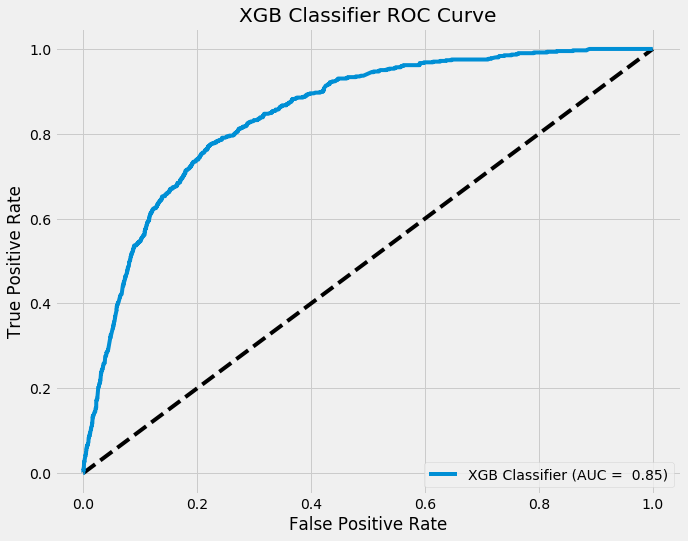

In [24]:
# set figsize
figsize(10,8)

# plot styple
plt.style.use('fivethirtyeight')

# plot roc
ROC.plot_roc()

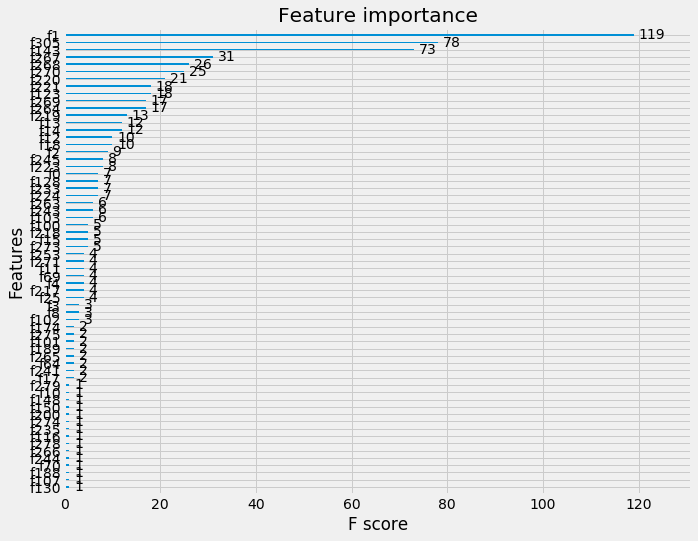

In [25]:
# Feature Importance
# set figsize
figsize(10,8)

# plot styple
plt.style.use('fivethirtyeight')

# plot feature importance
xgb.plot_importance(pipeline.named_steps['xgb'])

In [26]:
# Using PCA to reduce dimensionality
# XGBClassifier
xgb_cl = xgb.XGBClassifier(random_state=42)

In [27]:
# Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%
pca = PCA(n_components=0.95)

In [28]:
pipe = Pipeline(steps=[('scl', StandardScaler()),('pca', pca), ('xgb', xgb_cl)])

In [29]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=0.95,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
            

In [30]:
# ROC AUC Curve on the reduced data
# predict on the test set
#X_test_std = sc.fit_transform(X_test)
y_pred_prob_test = pipe.predict_proba(X_test)[:, 1] # [:, 1]: the second value is the probability for 1

In [31]:
# instantiate a roc_auc object
ROC = roc_auc(y_test, y_pred_prob_test, model='XGB')

In [32]:
# AUC Score
ROC.auc()

0.8361827283478667

In [33]:
# It is common for performance to drop slightly when reducing dimensionality, 
# because we do lose some useful signal in the process.

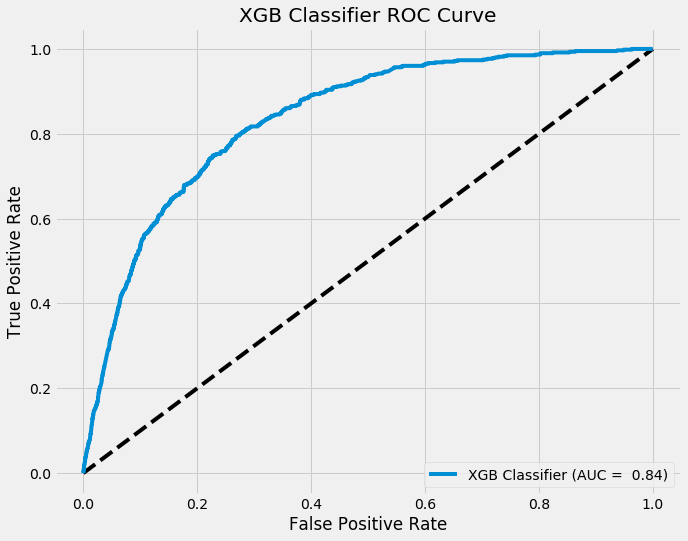

In [34]:
# set figsize
figsize(10,8)

# plot styple
plt.style.use('fivethirtyeight')

# plot roc
ROC.plot_roc()

In [35]:
# Make predictions on the test set
# for submission
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [36]:
df_test_id = df_test['ID']
df_test = df_test.drop(['ID'], axis=1)
df_test.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [37]:
# ROC AUC Curve
# predict on the test set
y_pred_test = pipeline.predict_proba(df_test)[:, 1] # [:, 1]: the second value is the probability for 1

In [38]:
# Write dataframe to csv
# for submission
submission = pd.DataFrame({ 'ID': df_test_id,'Satisfaction': y_pred_test})
submission.to_csv('.../santander-customer/predictions.csv', index=False)